In [387]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [388]:
df = pd.read_csv("data/racquet.csv")

In [389]:
df.shape
df

,Racquet,Overall,Groundstrokes,Volleys,Serves,Returns,Power,Control,Maneuverability,Stability,Comfort,TouchFeel,Topspin,Slice,Price
0,Babolat Pure Aero 2023,84,84.0,83.0,84.0,86.0,83.0,80.0,85.0,81.0,82.0,81.0,89.0,82.0,$259.00
1,Babolat Pure Drive Plus,86,87.0,87.0,85.0,85.0,87.0,83.0,82.0,88.0,83.0,82.0,89.0,85.0,$249.00
2,Babolat Pure Drive,87,85.0,83.0,87.0,85.0,92.0,80.0,85.0,85.0,82.0,79.0,83.0,86.0,$249.00
3,Babolat Pure Strike 16x19 3rd Gen,86,88.0,85.0,86.0,87.0,87.0,84.0,88.0,84.0,84.0,86.0,86.0,87.0,$139.00
4,Babolat Pure Strike 18x20 3rd Gen,81,82.0,86.0,84.0,79.0,80.0,86.0,81.0,85.0,81.0,82.0,80.0,85.0,$139.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Yonex VCORE 100+,8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Order Now
114,Yonex VCORE 95 2023,83,85.0,83.0,83.0,79.0,76.0,84.0,80.0,80.0,90.0,85.0,84.0,80.0,$269.00
115,Yonex VCORE 98 2023,84,85.0,82.0,83.0,84.0,84.0,81.0,79.0,85.0,86.0,81.0,89.0,86.0,$269.00
116,Yonex VCORE 98+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Order Now


### Removing uneccesary coloumns and cleaning up the names

In [390]:
df.columns


Index(['Racquet', 'Overall', 'Groundstrokes', 'Volleys', 'Serves', 'Returns',
       'Power', 'Control', 'Maneuverability', 'Stability', 'Comfort',
       'TouchFeel', 'Topspin', 'Slice', 'Price'],
      dtype='object')

In [391]:
df = df[['Racquet', 'Power', 'Control', 'Maneuverability', 'Stability', 'Comfort','TouchFeel', 'Topspin', 'Slice', 'Price']]
df.shape

(118, 10)

In [392]:
df = df.rename(columns={"TouchFeel": "Touch"})

### Checking and removing duplicates

In [393]:
df.duplicated(["Racquet"]).sum()
df.drop_duplicates(["Racquet"])

,Racquet,Power,Control,Maneuverability,Stability,Comfort,Touch,Topspin,Slice,Price
0,Babolat Pure Aero 2023,83.0,80.0,85.0,81.0,82.0,81.0,89.0,82.0,$259.00
1,Babolat Pure Drive Plus,87.0,83.0,82.0,88.0,83.0,82.0,89.0,85.0,$249.00
2,Babolat Pure Drive,92.0,80.0,85.0,85.0,82.0,79.0,83.0,86.0,$249.00
3,Babolat Pure Strike 16x19 3rd Gen,87.0,84.0,88.0,84.0,84.0,86.0,86.0,87.0,$139.00
4,Babolat Pure Strike 18x20 3rd Gen,80.0,86.0,81.0,85.0,81.0,82.0,80.0,85.0,$139.00
...,...,...,...,...,...,...,...,...,...,...
113,Yonex VCORE 100+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Order Now
114,Yonex VCORE 95 2023,76.0,84.0,80.0,80.0,90.0,85.0,84.0,80.0,$269.00
115,Yonex VCORE 98 2023,84.0,81.0,79.0,85.0,86.0,81.0,89.0,86.0,$269.00
116,Yonex VCORE 98+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Order Now


### Checking for and removing Null Values

In [394]:
df.isna().sum() / df.shape[0] 

Racquet            0.000000
Power              0.262712
Control            0.262712
Maneuverability    0.262712
Stability          0.262712
Comfort            0.262712
Touch              0.262712
Topspin            0.262712
Slice              0.262712
Price              0.042373
dtype: float64

In [395]:
df = df.dropna()
df

,Racquet,Power,Control,Maneuverability,Stability,Comfort,Touch,Topspin,Slice,Price
0,Babolat Pure Aero 2023,83.0,80.0,85.0,81.0,82.0,81.0,89.0,82.0,$259.00
1,Babolat Pure Drive Plus,87.0,83.0,82.0,88.0,83.0,82.0,89.0,85.0,$249.00
2,Babolat Pure Drive,92.0,80.0,85.0,85.0,82.0,79.0,83.0,86.0,$249.00
3,Babolat Pure Strike 16x19 3rd Gen,87.0,84.0,88.0,84.0,84.0,86.0,86.0,87.0,$139.00
4,Babolat Pure Strike 18x20 3rd Gen,80.0,86.0,81.0,85.0,81.0,82.0,80.0,85.0,$139.00
...,...,...,...,...,...,...,...,...,...,...
107,Yonex EZONE 98,81.0,84.0,84.0,81.0,85.0,84.0,83.0,82.0,$269.00
112,Yonex VCORE 100 2023,89.0,81.0,85.0,83.0,85.0,85.0,88.0,84.0,$269.00
114,Yonex VCORE 95 2023,76.0,84.0,80.0,80.0,90.0,85.0,84.0,80.0,$269.00
115,Yonex VCORE 98 2023,84.0,81.0,79.0,85.0,86.0,81.0,89.0,86.0,$269.00


### Plot the data

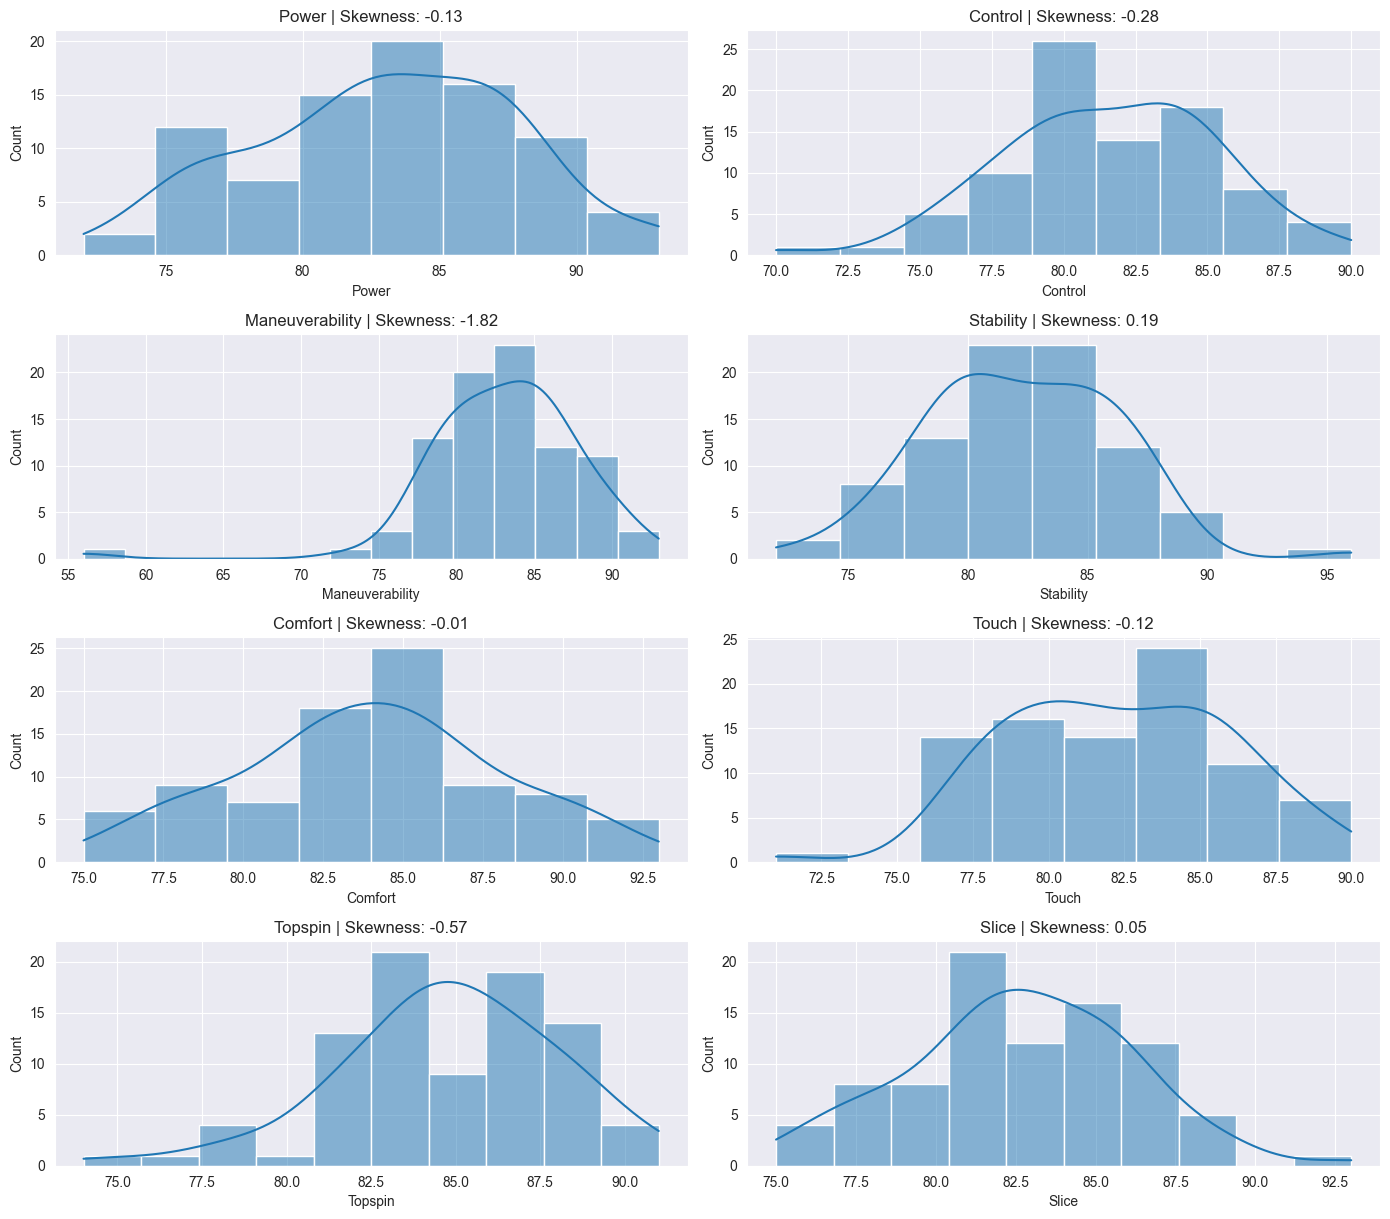

In [396]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes("number").columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	
	# Kernel density plot
	sns.histplot(df[feature], kde=True)
	plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

### Remove obvious outliers

In [397]:
df.drop(df[df["Maneuverability"] < 70].index)

,Racquet,Power,Control,Maneuverability,Stability,Comfort,Touch,Topspin,Slice,Price
0,Babolat Pure Aero 2023,83.0,80.0,85.0,81.0,82.0,81.0,89.0,82.0,$259.00
1,Babolat Pure Drive Plus,87.0,83.0,82.0,88.0,83.0,82.0,89.0,85.0,$249.00
2,Babolat Pure Drive,92.0,80.0,85.0,85.0,82.0,79.0,83.0,86.0,$249.00
3,Babolat Pure Strike 16x19 3rd Gen,87.0,84.0,88.0,84.0,84.0,86.0,86.0,87.0,$139.00
4,Babolat Pure Strike 18x20 3rd Gen,80.0,86.0,81.0,85.0,81.0,82.0,80.0,85.0,$139.00
...,...,...,...,...,...,...,...,...,...,...
107,Yonex EZONE 98,81.0,84.0,84.0,81.0,85.0,84.0,83.0,82.0,$269.00
112,Yonex VCORE 100 2023,89.0,81.0,85.0,83.0,85.0,85.0,88.0,84.0,$269.00
114,Yonex VCORE 95 2023,76.0,84.0,80.0,80.0,90.0,85.0,84.0,80.0,$269.00
115,Yonex VCORE 98 2023,84.0,81.0,79.0,85.0,86.0,81.0,89.0,86.0,$269.00


### Map the racquets to only their specific brand

In [398]:
df_copy = df.copy()

brand_list = ["Babolat", "Dunlop", "Head", "Prince", "Wilson", "Yonex", "Tecnifibre", "Volkl"]


df[df['Racquet'].str.contains('|'.join(brand_list), case=False, na=False)]

# Regular expression pattern to extract brand names
pattern = '|'.join(brand_list)

# Extract brand names using str.extract() method
df['Racquet'] = df['Racquet'].str.extract(f'({pattern})', expand=False)

# Drop rows with NaN values after extraction
df = df.dropna()


In [399]:
df["Racquet"].value_counts()

Racquet
Prince        18
Babolat       13
Yonex          9
Tecnifibre     8
Volkl          8
Wilson         8
Dunlop         7
Head           7
Name: count, dtype: int64

### Extracting Data

In [400]:
# Extract Data
features = ['Power', 'Control', 'Maneuverability', 'Stability', 'Comfort','Touch', 'Topspin', 'Slice']
X = df[features]
y = df["Racquet"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

### Hyperparameter Tuning

In [401]:
# Define a range of k values to test
k_values = list(range(1, 20, 2)) #Odd values from 1 to 20

# Initialize an empty list four our scores
cv_scores = []

# Preform 5-fold cross validation for each k value
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    print(k, scores)
    cv_scores.append(scores.mean())

1 [0.19047619 0.19047619 0.2       ]
3 [0.0952381  0.19047619 0.15      ]
5 [0.0952381  0.19047619 0.3       ]
7 [0.23809524 0.19047619 0.3       ]
9 [0.19047619 0.23809524 0.4       ]
11 [0.19047619 0.19047619 0.4       ]
13 [0.19047619 0.28571429 0.35      ]
15 [0.19047619 0.28571429 0.3       ]
17 [0.23809524 0.28571429 0.35      ]
19 [0.23809524 0.33333333 0.3       ]


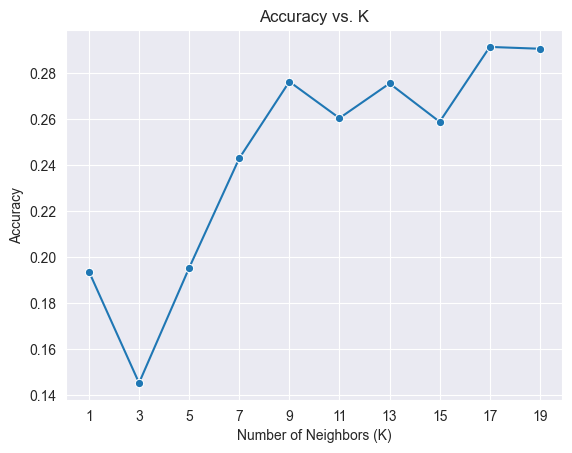

In [402]:
# Plot our Cross Validation Results
sns.lineplot(x=k_values, y=cv_scores, marker='o')
plt.title('Accuracy vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)

<Axes: >

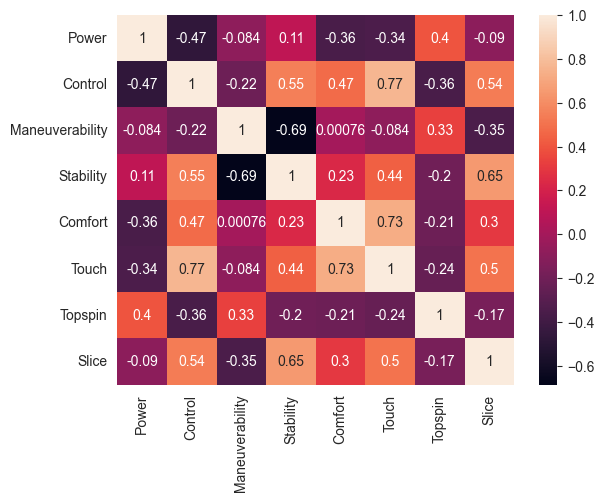

In [403]:
numeric = df.select_dtypes("number")
cor = numeric.corr()
sns.heatmap(cor, annot=True)

### Feature Selection 

In [404]:
features = ['Power', 'Control', 'Maneuverability', 'Stability', 'Comfort','Touch', 'Topspin', 'Slice']
y = df["Racquet"]
model = KNeighborsClassifier(n_neighbors=13)
best_score = 0
best_feature = None
selected_features = []
length = len(features)
for i in range(length):
    best_score = 0
    best_feature = None
    for feature in features:
        X = df[[feature] + selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
        model = model.fit(X_train, y_train)
        # Evaluate the model
        score = model.score(X_test, y_test) 
        # print("Feature:", feature, "Best Score:", best_score, "Score:", score)
        if score > best_score:
            best_score = score
            best_feature = feature
    selected_features.append(best_feature)
    features.remove(best_feature)
    print("Added: ", best_feature)
    print("Selected Features:", selected_features, "Score:", best_score)

Added:  Comfort
Selected Features: ['Comfort'] Score: 0.375
Added:  Slice
Selected Features: ['Comfort', 'Slice'] Score: 0.4375
Added:  Power
Selected Features: ['Comfort', 'Slice', 'Power'] Score: 0.4375
Added:  Maneuverability
Selected Features: ['Comfort', 'Slice', 'Power', 'Maneuverability'] Score: 0.4375
Added:  Stability
Selected Features: ['Comfort', 'Slice', 'Power', 'Maneuverability', 'Stability'] Score: 0.375
Added:  Touch
Selected Features: ['Comfort', 'Slice', 'Power', 'Maneuverability', 'Stability', 'Touch'] Score: 0.5
Added:  Control
Selected Features: ['Comfort', 'Slice', 'Power', 'Maneuverability', 'Stability', 'Touch', 'Control'] Score: 0.4375
Added:  Topspin
Selected Features: ['Comfort', 'Slice', 'Power', 'Maneuverability', 'Stability', 'Touch', 'Control', 'Topspin'] Score: 0.4375


## Building Our Model

### Extracting Data

In [405]:
# Extract Data
features = ['Comfort', 'Slice', 'Power', 'Maneuverability', 'Stability', 'Touch']
X = df[features]
y = df["Racquet"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#Create the model
model = KNeighborsClassifier(n_neighbors=13)

# Train the model
model = model.fit(X_train, y_train)

### Get User Input

In [406]:
power = int(input("On a scale of 70-100 how much power do you want in your racket: "))
maneuverability = int(input("On a scale of 70-100 how much maneuverability do you want in your racket: "))
stability = int(input("On a scale of 70-100 how much stability do you want in your racket: "))
comfort = int(input("On a scale of 70-100 how much comfort do you want in your racket: "))
touch = int(input("On a scale of 70-100 how much touch do you want in your racket: "))
slice_val = int(input("On a scale of 70-100 how much slice do you want in your racket: "))

### Using the Model to Classify the Users Data

In [407]:
lst = [[comfort, slice_val, power, maneuverability, stability, touch]]
dic = {"Comfort": comfort, "Slice": slice_val, "Power": power, "Maneuverability": maneuverability, "Stability": stability, "Touch": touch}
prediction = model.predict(lst)

/Users/stefanperkovic/Desktop/Racquet-Recommender/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Answer the question that appear above on a scale of 70-100 for how much you value certain traits in your raquet. Be aware that not all traits can be done at the max. Example is that you can't have 100 control and 100 power at the same time. 


Questions: 
1. On a scale of 70-100 how much POWER do you want in your racket
2. On a scale of 70-100 how much MANEUVERABILITY do you want in your racket
3. On a scale of 70-100 how much STABILITY do you want in your racket
4. On a scale of 70-100 how much COMFORT do you want in your racket
5. On a scale of 70-100 how much TOUCH do you want in your racket
6. On a scale of 70-100 how much SLICE do you want in your racket

# Brand Recommendation

In [408]:
print("The Brand of Racquet that is reccommended for you is " + prediction[0])

The Brand of Racquet that is reccommended for you is Prince


# Your Preferences compared to specific models the racquet

In [409]:
print(dic)

for racquet in df_copy["Racquet"]:
    if prediction[0] in racquet:
        print(racquet)

{'Comfort': 83, 'Slice': 83, 'Power': 83, 'Maneuverability': 83, 'Stability': 83, 'Touch': 83}
Prince Ripstick 100 300g
Prince Textreme Warrior 100
Prince ATS Textreme Tour 100 290
Prince ATS Textreme Tour 100 310
Prince ATS Textreme Tour 100P
Prince ATS Textreme Tour 95
Prince ATS Textreme Tour 98
Prince O3 Legacy 105
Prince Tour Diablo MP
Prince Twistpower X100 Tour
Prince Twistpower X100
Prince Twistpower X105 (290g)
Prince Phantom 100G
Prince Phantom 100X 18x20
Prince Phantom 100X 305
Prince Phantom 93P (18x20)
Prince Phantom 97P
Prince Phantom 107G
